In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import librosa
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 
import tensorflow as tf
from scipy.io import wavfile as wav
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('sound_split/metadata_20_mfcc.csv')

In [3]:
X = dataset.iloc[:,].values[:,1:20]
y = dataset.iloc[:, 0].values
unique_class = dataset['class_name'].unique()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [4]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [8]:
gnb.score(X_train, y_train)

0.7677450507001449

In [5]:
y_pred = gnb.predict(X_test)

In [6]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

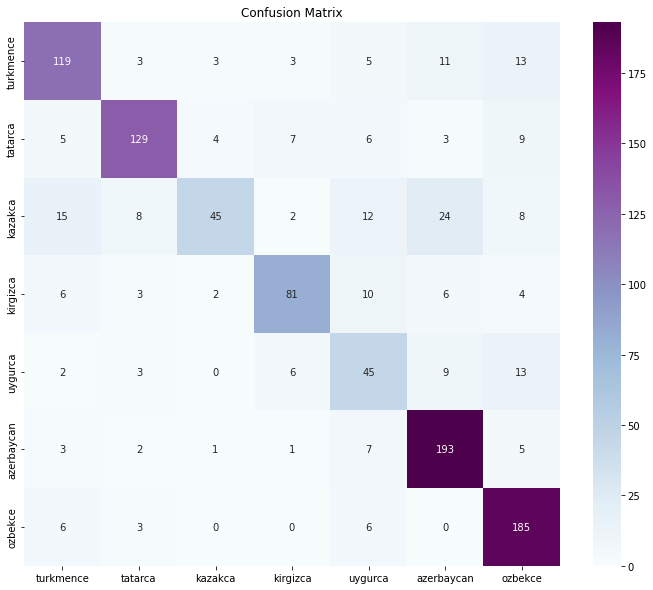

In [7]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cm, index = [i for i in unique_class],
                  columns = [i for i in unique_class])
plt.figure(figsize = (12,10))
plt.title("Confusion Matrix")
ss = sn.heatmap(df_cm, annot=True,fmt="d", cmap="BuPu")
figure = ss.get_figure()    
figure.savefig('naiveBayes_conf.png', dpi=400)

In [12]:
from sklearn.metrics import f1_score
# f1 score
score = f1_score(y_pred, y_test,pos_label='positive',
                                           average='micro')
score

0.7693050193050193

In [14]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("Precision Score : ",precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='macro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='macro'))

Precision Score :  0.7578508605853498
Recall Score :  0.7256606270882096
